In [10]:
from sklearn.datasets import fetch_openml
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

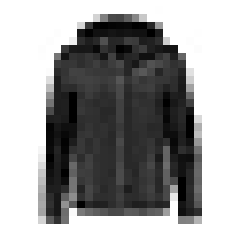

In [23]:
# new_y_train = np.asarray([cv2.resize(cv2.imread(i), dsize=(64, 64), interpolation = cv2.INTER_AREA) for i in y_train])

temp = X_train[0]
temp_image = temp.reshape(28,28)

plt.imshow(temp_image, cmap="binary")
plt.axis("off")
# plt.show()

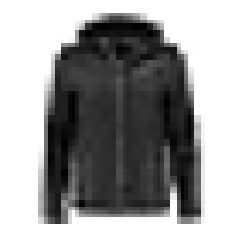

(64, 64)


In [19]:
new_temp = cv2.resize(temp_image, (64, 64), interpolation = cv2.INTER_AREA)

plt.imshow(new_temp, cmap="binary")
plt.axis("off")
plt.show()

print(new_temp.shape)

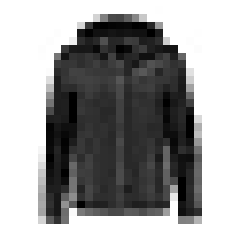

In [4]:
some_digit = X_train[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))


In [ ]:
history = stacked_ae.fit(X_train, X_train, epochs=20, validation_data=[X_valid, X_valid])

In [ ]:
some_digit = X_valid[1]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
test = stacked_ae.predict(X_valid)

In [ ]:
reconstructed = test[1]
reconstructed_image = reconstructed.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

stacked_ae_longer = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae_longer.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))

history_longer_train = stacked_ae_longer.fit(X_train, X_train, epochs=20, validation_data=[X_valid, X_valid])

In [ ]:
test_longer = stacked_ae_longer.predict(X_valid)

In [41]:
new_y = np.asarray([cv2.resize(i, (64, 64), interpolation = cv2.INTER_AREA) for i in X_train ])

In [40]:
t = X_train[0].reshape(28,28) * 255
t_2 = cv2.resize(t, (64, 64), interpolation = cv2.INTER_AREA)
print(t_2.shape)

(64, 64)


In [ ]:
reconstructed = test_longer[1]
reconstructed_image = reconstructed.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [42]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28,28,1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_encoder.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5))

In [ ]:
new_model = conv_encoder.fit(X_train, new_y)

In [ ]:
reconstructed = new
reconstructed_image = reconstructed.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()